Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataset details:
Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survival: indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target
Name: contains title and full names
Sex: shows Male/female
Age: Individual age
Sibsp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Ticket: Ticket number.
Fare: Passenger fare.
Cabin: Doesthe location of the cabin influence chances of survival?
Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory Data Analysis

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age is an important variables but with some missing numbers. we need to fill the gaps up using the mean value of the age.

In [8]:
#Replacing null values in Age column witrh the mean
df['Age'] = df['Age'].fillna(df['Age'].mean()) 

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Checking the variables in 'Embarked' column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
# To replace the nan value with mode in the 'Embarked' column bcause its a categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
#Checking the effect of replacing null value with mode
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
#Checking the effect of replacing null value in both 'Age and Embarked' Columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
#Checking the effect of replacing null value with mode
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())

In [15]:
# Encoding columns Sex and Embarked into numeric variables
df['Sex'] = df['Sex'].map( {'female': 1,'male':0})
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2})

In [16]:
#Reviewing the dataframe to verify effects of pre-prepation and data cleaning done
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,G6,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,2


In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [18]:
df['Fare'] = df['Fare'].astype(int)

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int32
Cabin           object
Embarked         int64
dtype: object

In [20]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [21]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7,1
1,1,1,1,38.000000,1,0,71,2
2,1,3,1,26.000000,0,0,7,1
3,1,1,1,35.000000,1,0,53,1
4,0,3,0,35.000000,0,0,8,1
5,0,3,0,29.699118,0,0,8,0
6,0,1,0,54.000000,0,0,51,1
7,0,3,0,2.000000,3,1,21,1
8,1,3,1,27.000000,0,2,11,1
9,1,2,1,14.000000,1,0,30,2


In [22]:
#Removing decimal and make a whole number in the Age coloumn
df['Age'] = df['Age'].round()

In [23]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7,1
1,1,1,1,38.0,1,0,71,2
2,1,3,1,26.0,0,0,7,1
3,1,1,1,35.0,1,0,53,1
4,0,3,0,35.0,0,0,8,1


# Data Visualization

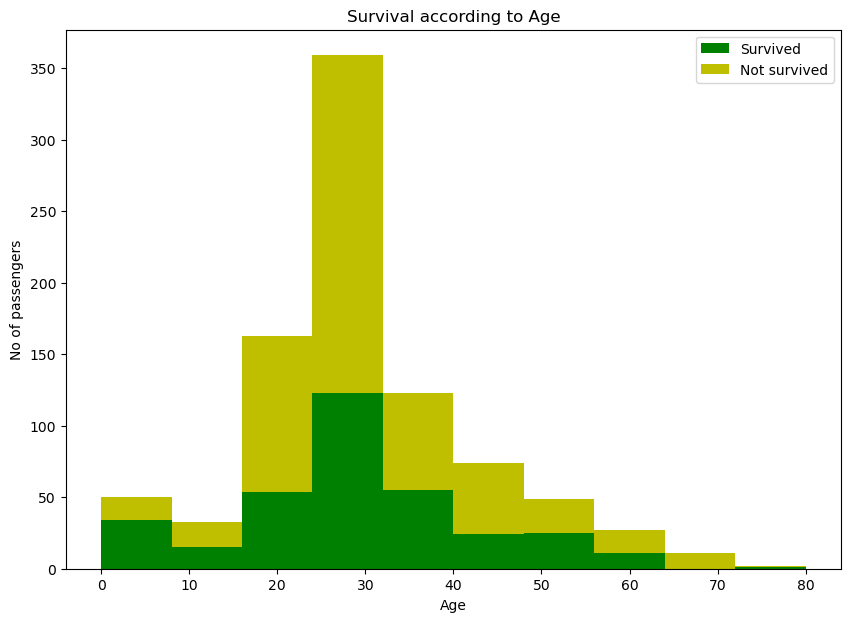

In [24]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','y'],label = ['Survived','Not survived'])
plt.title('Survival according to Age')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

Observations:
1. The highest non survivors are within the age brackets of 20 - 30
2. The same for highest numbers of survivors 
3. As ages are going up from 40 years, survival rate drops significantly with Ages above 70 is the survvived the least
4. Highest survivors are aged 25 - 30

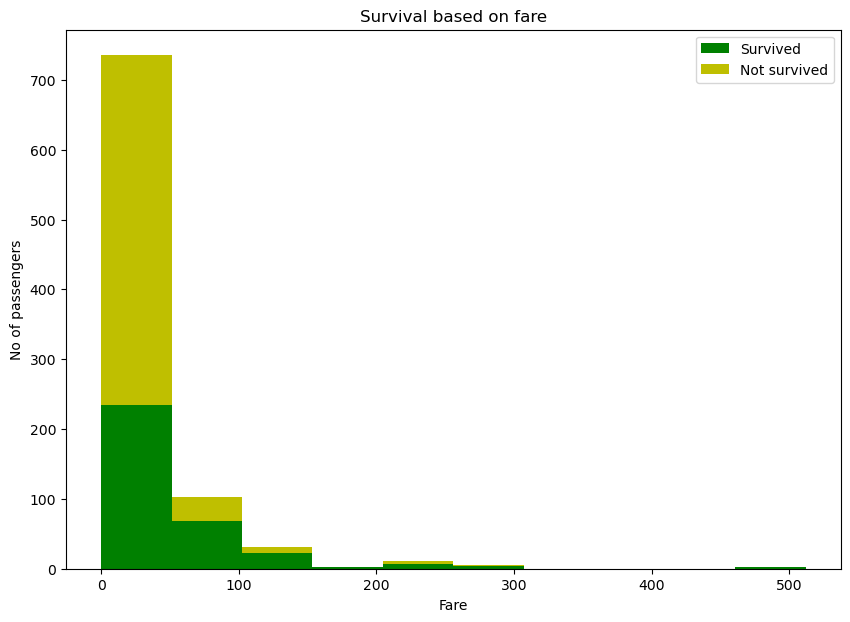

In [25]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],stacked=True, color = ['g','y'],label = ['Survived','Not survived'])
plt.title('Survival based on fare')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

Observation:
As low as $100 worth of fare survived, so was the highest non survivals. This suggests the fare rate does not really has impacts on the passengers survival rate.

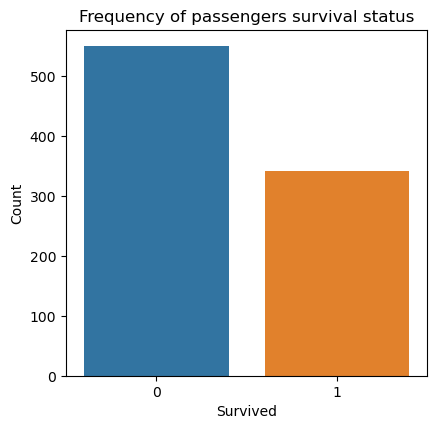

In [26]:
# Plotting the count of each quality class
fig = plt.figure(figsize=(12, 8))  
plt.subplot(2, 3, 1)  # Create a subplot in the figure

sns.countplot(data=df, x='Survived')
plt.title("Frequency of passengers survival status")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.tight_layout()  
plt.show()

The plot indicates highest numbers of passangers did not survived the incidence with almost 2/3 survived.

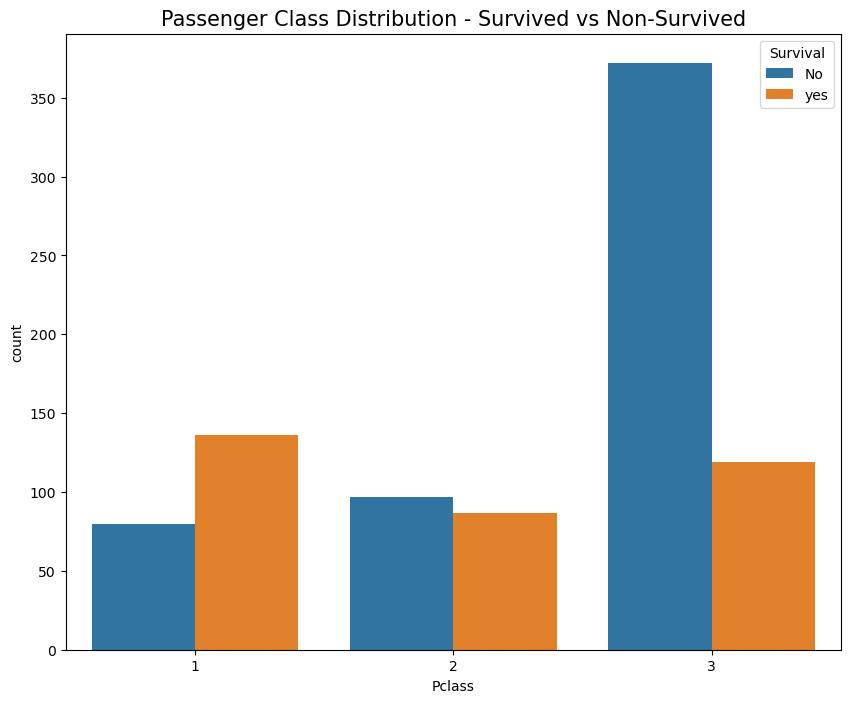

In [27]:
#Pclass and Survived
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

Observations:
1. The highest non - survival are those in 3rd class
2. People in 1st class has the highest survival passengers and followed by 3rd class

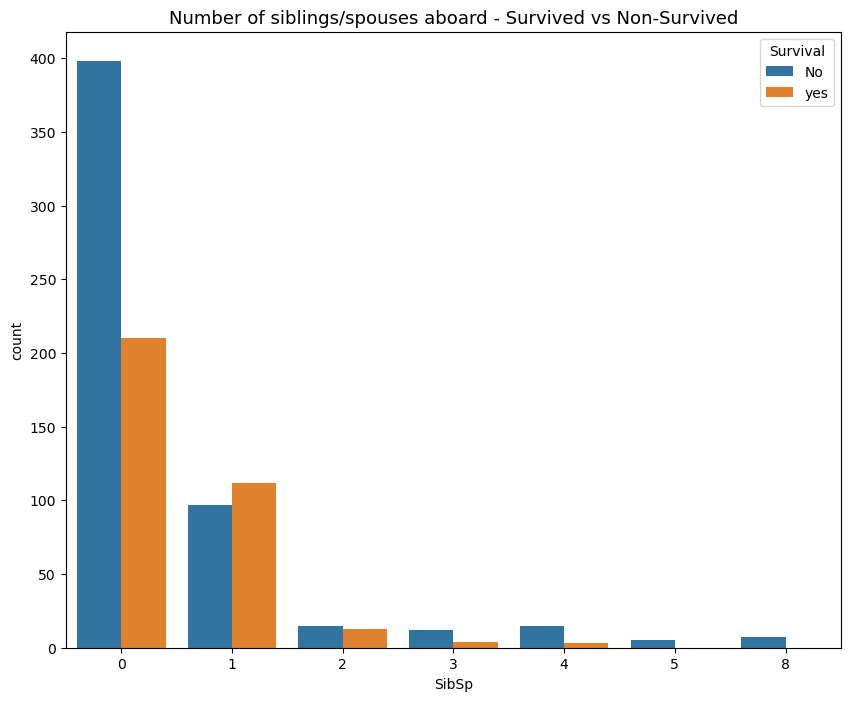

In [102]:
#SibSp (Number of siblings/spouses aboard) and Survived
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='SibSp',hue='Survived',data=df)
plt.title("Number of siblings/spouses aboard - Survived vs Non-Survived", fontsize = 13)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

Observations: 
Generally, its expected that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two.

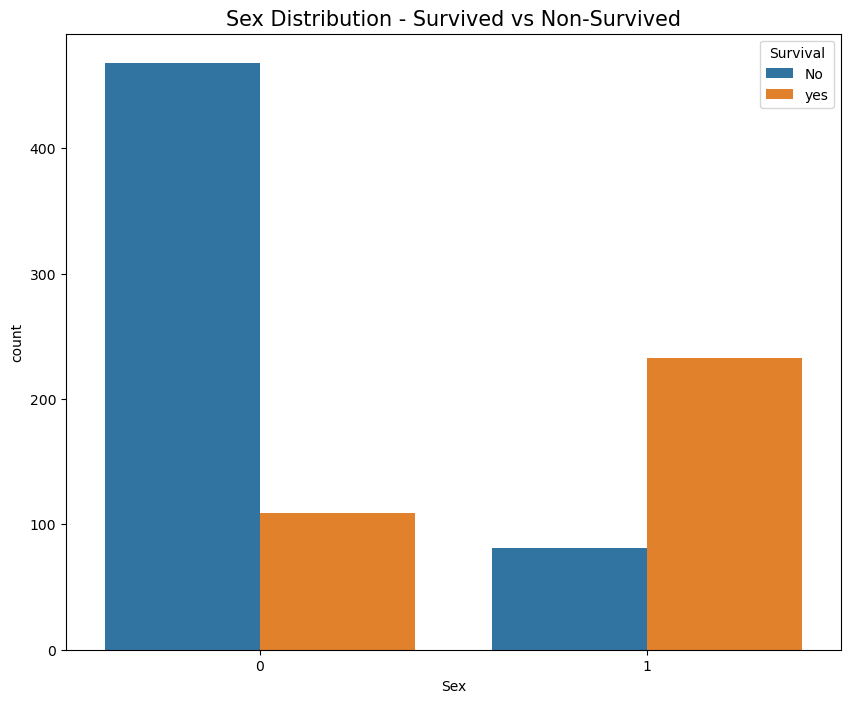

In [28]:
#Sex(Gender) and Survived
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Sex Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

Female passengers survived more than male pessangers with over 50% and highest numbers of Male were recorded as non - survivors

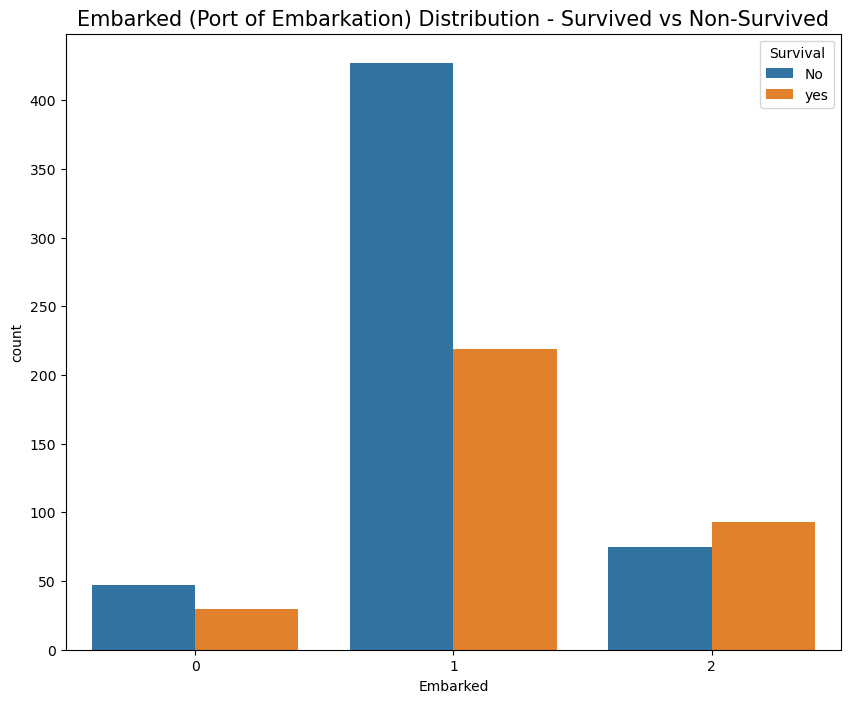

In [29]:
#Pclass and Survived
plt.subplots(figsize = (10,8))
ax=sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title("Embarked (Port of Embarkation) Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

Observations:
1. The highest non - survival are seen from those who embarked at S = Southampton, and with least from Q = Queenstown
2. Similar with non survival counts, the highest numbers of survival are embarked from Southampton, followed by Cherbourg

In [30]:
#Splitting the data
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [31]:
#Spliting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (712, 7)
Shape of x_test:  (179, 7)
Shape of y_train:  (712,)
Shape of y_test (179,)


In [33]:
#Training of the LinearRegression model for the predictions

#Loading the regression
regressor = LogisticRegression()

In [34]:
regressor.fit(x_train, y_train)

LogisticRegression()

In [35]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 80.45%


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision: 0.70
Recall: 0.57
Confusion Matrix:
[[87 18]
 [32 42]]


In [37]:
# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

In [54]:
# Train the classifier on your data
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
# Fit the model to the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Calculate accuracy
dtcacc = accuracy_score(y_pred,y_test)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(dtcacc*100))

Decision Tree Classifier accuracy: 77.65%


In [61]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision_Score: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall_Score: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision_Score: 0.74
Recall_Score: 0.70
Confusion Matrix:
[[87 18]
 [22 52]]


In [65]:
# Create an SVC model with optional parameters
SVC_model = SVC()

In [66]:
# Fit the model to the training data
SVC_model.fit(x_train, y_train)

SVC()

In [67]:
# Make predictions on the test data
y_pred = SVC_model.predict(x_test)

SVCacc = accuracy_score(y_pred,y_test)
print('Support Vector Classifier  accuracy: {:.2f}%'.format(SVCacc*100))

Support Vector Classifier  accuracy: 65.36%


In [68]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision_Score: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall_Score: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision_Score: 0.75
Recall_Score: 0.24
Confusion Matrix:
[[99  6]
 [56 18]]


In [69]:
# Create a RandomForestClassifier
RFC = RandomForestClassifier()

In [70]:
# Train the classifier on your data
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
RFC.fit(x_train, y_train)

# Make predictions on the test data
y_pred = RFC.predict(x_test)

# Calculate accuracy
RFCacc = accuracy_score(y_pred,y_test)
print('RandomForestClassifier accuracy: {:.2f}%'.format(RFCacc*100))

RandomForestClassifier accuracy: 81.01%


In [72]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision_Score: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall_Score: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision_Score: 0.78
Recall_Score: 0.76
Confusion Matrix:
[[89 16]
 [18 56]]


In [73]:
#KNeighborsClassifier Model
KNC = KNeighborsClassifier(n_neighbors=7)

In [74]:
# Train the classifier on your data
KNC.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
KNC.fit(x_train, y_train)

# Make predictions on the test data
y_pred = KNC.predict(x_test)

# Calculate accuracy
KNCacc = accuracy_score(y_pred,y_test)
print('KNeighborsClassifier accuracy: {:.2f}%'.format(KNCacc*100))

KNeighborsClassifier accuracy: 72.07%


In [76]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision_Score: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall_Score: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision_Score: 0.70
Recall_Score: 0.57
Confusion Matrix:
[[87 18]
 [32 42]]


In [103]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

GradientBoostingClassifier()

In [104]:
gbk.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbk.predict(x_test)

# Calculate accuracy
gbkacc = accuracy_score(y_pred,y_test)
print('GradientBoostingClassifier accuracy: {:.2f}%'.format(KNCacc*100))

GradientBoostingClassifier accuracy: 72.07%


In [105]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision_Score: {:.2f}'.format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall_Score: {:.2f}'.format(recall))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Precision_Score: 0.84
Recall_Score: 0.70
Confusion Matrix:
[[95 10]
 [22 52]]


    # Compare Models

In [107]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Support Vector Machines', 'Random Forest',  'KNeighbors', 'GradientBoosting',
    ],
       'Accuracy Score': [
        LRAcc, dtcacc, SVCacc, RFCacc, KNCacc, gbkacc,
    ]
    
})

In [108]:
models.sort_values(by='Accuracy Score', ascending = False)

,Model,Accuracy Score
5,GradientBoosting,0.821229
3,Random Forest,0.810056
0,Logistic Regression,0.804469
1,Decision Tree,0.776536
4,KNeighbors,0.720670
2,Support Vector Machines,0.653631


1. GradientBoosting shows the highest accuracy of 82%, follow by, Random forest and Logistic Regression 81% & 80.4%. Deciston Tree 77.6%, Kneighbors 72% and lowest 65% from SVM. 
2. Other criteria for assessing the models include Precision Score and Recall Score. Random Forest indicates a high value over others ie 78 and 76 respectively.
3. For this reason, RandomForestClassifier is used for the prediction.                           

In [112]:
#We can check precision,recall,f1-score!
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



Interpretation:
1. The precision, recall, and F1-score values provide insights into how well the Gradient Boosting model performs for each class (class 0: Non- survived and class 1: Survived).
2. For class 0, the model has high precision (0.81) and high recall (0.90), indicating that it's good at correctly identifying class 0 instances while minimizing false positives.
3. For class 1, the model has slightly lower precision (0.84) but relatively high recall (0.70), suggesting that it's reasonably good at capturing class 1 instances, although there may be some false positives.
4. The F1-scores for both classes are reasonably high, indicating a good balance between precision and recall.

In [109]:
#Saving the model using .pkl
import joblib
joblib.dump(gbk, "Predicting Titanic survivors.pkl")

['Predicting Titanic survivors.pkl']

In [110]:
#Predicting the saved model
RFC = joblib.load("Predicting Titanic survivors.pkl")

#Prediction
prediction = gbk.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [111]:
#checking the prediction with original value
a = np.array(y_test)
df1 = pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,0,0
175,0,0
176,0,1
177,1,1


# Conclusion:
    

With the Problem Statement to predict Titanic Survival. The challenge is to predict who survived the Titanic disaster based on certain passenger features. Given a dataset containing information about passengers such as age, gender, class, family size, etc., Passangers were that accurately classified into two categories: those who survived and those who did not survive the Titanic tragedy. A predictive model was selected among others used to train the dataset using some crieria such as accuracy, precision, recall scores. 

Gradient Boosting machine learning model was used to predict the classification problem of the dataset with an accuracy score of of 82, precision score of 84 with 72 score for a recall. 